In [1]:
!pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for google-search-results: filename=google_search_results-2.4.1-py3-none-any.whl size=25789 sha256=3026a6ff2bca83fb7ff28fed831551ea76d25f37372cde6ec236e11d697ec061
  Stored in directory: /root/.cache/pip/wheels/82/a3/c5/364155118f298722dff2f79ae4dd7c91e92b433ad36d6f7e0e
Successfully built google-search-results


In [2]:
from serpapi import GoogleSearch
from urllib.parse import *

Hotel semarang

In [ ]:
params = {
  "engine": "google_maps",
  "q": "Hotel Semarang",
  "ll": "@40.7455096,-74.0083012,15.1z",
  "type": "search",
  "api_key": "f5a9d65505ed4be4ace874f1d3175f973c38dc658329da3154aea13897bc5982"
}

search = GoogleSearch(params)

mPosition = 0 # Angka indeks dari data
mNums = 5 # Batas jumlah data yang ditampilkan
local_results = []

while mPosition <= mNums:
  results = search.get_dict()

  for result in results["local_results"]:
    mPosition += 1
    
    if mPosition <= mNums:
      
      # Jika jumlah review kurang dari 150, maka jangan masukkan datanya
      if result["reviews"] < 150:
        mNums += 1
        continue
        
      # Append data sesuai dengan batas jumlah yang sudah ditentukan
      local_results.append({'title': result["title"],
                           'data_id': result["data_id"],
                           'reviews_total': result["reviews"]});

  if "next" in results.get("serpapi_pagination", {}):
    # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
    search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

  else:
    break

https://serpapi.com/search


In [ ]:
for lr in local_results:
  print(lr)

{'title': 'Hotel Tentrem Semarang', 'data_id': '0x2e708b6a2e90c117:0x9f0aec6b0cf3b25b', 'reviews_total': 6874}
{'title': 'Hotel Ciputra Semarang managed by Swiss-Belhotel International', 'data_id': '0x2e708b58c69e0a8f:0xbe482de01dd3fcc7', 'reviews_total': 6773}
{'title': 'Gumaya Tower Hotel', 'data_id': '0x2e708b54831ad7bf:0x1e7ba1dedde1dd1c', 'reviews_total': 8183}
{'title': 'Novotel Semarang', 'data_id': '0x2e708b52741bef77:0xcb5219107dbe142a', 'reviews_total': 6400}
{'title': 'Hotel Santika Premiere Semarang', 'data_id': '0x2e708b597587dc27:0xcea4b269aec445b8', 'reviews_total': 5221}


In [ ]:
data = {'Hotel_name':[],
        'name':[],
        'rating':[],
        'review':[]}

for lr in local_results:
  
  params = {
    "engine": "google_maps_reviews",
    "data_id": "",
    "api_key": "f5a9d65505ed4be4ace874f1d3175f973c38dc658329da3154aea13897bc5982"
  }
  
  params["data_id"] = lr['data_id']

  search = GoogleSearch(params)

  mPosition = 0 # Angka indeks dari data
  mNums = 150 # Batas jumlah data yang ditampilkan

  while mPosition <= mNums:
    results = search.get_dict()

    for result in results["reviews"]:
      mPosition += 1

      if mPosition <= mNums:
        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        data['Hotel_name'].append(lr['title']);
        data['name'].append(result["user"]["name"]);
        data['rating'].append(result["rating"]);
        data['review'].append(result["snippet"]);

    if "next" in results.get("serpapi_pagination", {}):
      # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
      search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
      break
    
review_original = data['review']

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
h

In [ ]:
import pandas as pd
df_original = pd.DataFrame(data)
df_original.to_csv('processing.csv', index=False)

In [ ]:
df_original

,Hotel_name,name,rating,review
0,Hotel Tentrem Semarang,Melyanti Liando,5.0,I stayed in this hotel Twice. The first was on...
1,Hotel Tentrem Semarang,F Paul,5.0,We enjoyed our stay here. The room is not as b...
2,Hotel Tentrem Semarang,Cynthia Isabella,5.0,"Two months ago, I stayed at Tentrem Hotel Sema..."
3,Hotel Tentrem Semarang,Karel K. Himawan,5.0,The hotel that gives you a one of a kind exper...
4,Hotel Tentrem Semarang,Francois Barbe,5.0,First class service in a first class way. A re...
...,...,...,...,...
745,Hotel Santika Premiere Semarang,Rudy Hendrawan,5.0,"Excellent service, friendly staff, exactly in ..."
746,Hotel Santika Premiere Semarang,Alfa Yuli Kurniawan,4.0,"The hotel is old but very comfortable, but the..."
747,Hotel Santika Premiere Semarang,azusa Einzbern,4.0,"Great hotel with premium service, alas, the eq..."
748,Hotel Santika Premiere Semarang,Faisal Rahmat,5.0,A nice place if you at Semarang. This holet ne...


In [ ]:
review_remove_translated = []

for review in review_original:
  review_sep = review.split("(Translated by Google) ")
  
  # Jika terdapat (Translated by Google)
  if review_sep[0] == "":
    review_sep = ("".join(review_sep)).split("(Original)")
    review_sep = review_sep[0]
    review = "".join(review_sep)
    
  review_remove_translated.append(review)

Mengambil data csv

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [37]:
filename = "https://raw.githubusercontent.com/Youga19/UTS/main/processing.csv"
df = pd.read_csv(filename)
df.head()

,Hotel_name,name,rating,review
0,Hotel Tentrem Semarang,Melyanti Liando,5.0,I stayed in this hotel Twice. The first was on...
1,Hotel Tentrem Semarang,F Paul,5.0,We enjoyed our stay here. The room is not as b...
2,Hotel Tentrem Semarang,Cynthia Isabella,5.0,"Two months ago, I stayed at Tentrem Hotel Sema..."
3,Hotel Tentrem Semarang,Karel K. Himawan,5.0,The hotel that gives you a one of a kind exper...
4,Hotel Tentrem Semarang,Francois Barbe,5.0,First class service in a first class way. A re...


In [7]:
df.drop(columns = ['Hotel_name', 'name'], inplace = True)

In [8]:
df.head()

,rating,review
0,5.0,I stayed in this hotel Twice. The first was on...
1,5.0,We enjoyed our stay here. The room is not as b...
2,5.0,"Two months ago, I stayed at Tentrem Hotel Sema..."
3,5.0,The hotel that gives you a one of a kind exper...
4,5.0,First class service in a first class way. A re...


In [9]:
#  Shape of the dataset, and breakdown of the classes
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 750 rows and 2 columns


**Preprocessing the data**



1.   Cleaning text


In [3]:
import string
import re

In [10]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})


2. Adding Additional features (lenght of, and percentage of punctuations in the text)



In [11]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(str(x)))
df

,rating,review,cleaned_review,label,review_len,punct
0,5.0,I stayed in this hotel Twice. The first was on...,i stayed in this hotel twice the first was on...,1,265,5.7
1,5.0,We enjoyed our stay here. The room is not as b...,we enjoyed our stay here the room is not as b...,1,328,2.7
2,5.0,"Two months ago, I stayed at Tentrem Hotel Sema...",two months ago i stayed at tentrem hotel sema...,1,671,3.9
3,5.0,The hotel that gives you a one of a kind exper...,the hotel that gives you a one of a kind exper...,1,322,2.5
4,5.0,First class service in a first class way. A re...,first class service in a first class way a re...,1,229,6.1
...,...,...,...,...,...,...
745,5.0,"Excellent service, friendly staff, exactly in ...",excellent service friendly staff exactly in ...,1,105,4.8
746,4.0,"The hotel is old but very comfortable, but the...",the hotel is old but very comfortable but the...,1,62,1.6
747,4.0,"Great hotel with premium service, alas, the eq...",great hotel with premium service alas the eq...,1,172,2.3
748,5.0,A nice place if you at Semarang. This holet ne...,a nice place if you at semarang this holet ne...,1,93,1.1




3.   Tokenization



In [12]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens
0,5.0,I stayed in this hotel Twice. The first was on...,i stayed in this hotel twice the first was on...,1,265,5.7,"[i, stayed, in, this, hotel, twice, the, first..."
1,5.0,We enjoyed our stay here. The room is not as b...,we enjoyed our stay here the room is not as b...,1,328,2.7,"[we, enjoyed, our, stay, here, the, room, is, ..."
2,5.0,"Two months ago, I stayed at Tentrem Hotel Sema...",two months ago i stayed at tentrem hotel sema...,1,671,3.9,"[two, months, ago, i, stayed, at, tentrem, hot..."
3,5.0,The hotel that gives you a one of a kind exper...,the hotel that gives you a one of a kind exper...,1,322,2.5,"[the, hotel, that, gives, you, a, one, of, a, ..."
4,5.0,First class service in a first class way. A re...,first class service in a first class way a re...,1,229,6.1,"[first, class, service, in, a, first, class, w..."




4.   Lemmatization and Removing Stopwords



In [13]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5.0,I stayed in this hotel Twice. The first was on...,i stayed in this hotel twice the first was on...,1,265,5.7,"[i, stayed, in, this, hotel, twice, the, first...",stayed hotel twice first january second july r...
1,5.0,We enjoyed our stay here. The room is not as b...,we enjoyed our stay here the room is not as b...,1,328,2.7,"[we, enjoyed, our, stay, here, the, room, is, ...",enjoyed stay room not big star hotel java comf...
2,5.0,"Two months ago, I stayed at Tentrem Hotel Sema...",two months ago i stayed at tentrem hotel sema...,1,671,3.9,"[two, months, ago, i, stayed, at, tentrem, hot...",two month ago stayed tentrem hotel semarang fa...
3,5.0,The hotel that gives you a one of a kind exper...,the hotel that gives you a one of a kind exper...,1,322,2.5,"[the, hotel, that, gives, you, a, one, of, a, ...",hotel give one kind experience unlike star hot...
4,5.0,First class service in a first class way. A re...,first class service in a first class way a re...,1,229,6.1,"[first, class, service, in, a, first, class, w...",first class service first class way real five ...


**EDA**

In [15]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 750 rows and 8 columns
rating 1.0 = 34 rows
rating 2.0 = 20 rows
rating 3.0 = 64 rows
rating 4.0 = 165 rows
rating 5.0 = 467 rows


Number of null in label: 0
Number of null in text: 0


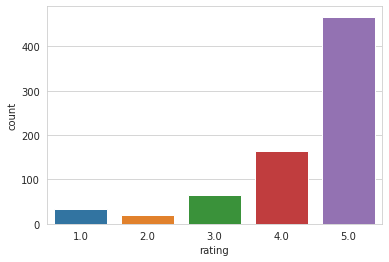

In [16]:
# Missing values in the dataset
print("Number of null in label: {}".format(df['rating'].isnull().sum()))
print("Number of null in text: {}".format(df['review'].isnull().sum()))
sns.countplot(x='rating', data=df);

Visualizing Word Clouds

In [17]:
from wordcloud import WordCloud

In [18]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0) ]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0) ]

#convert to list
negative_list= df_negative['lemmatized_review'].tolist()
positive_list=df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()

Postive Reviews

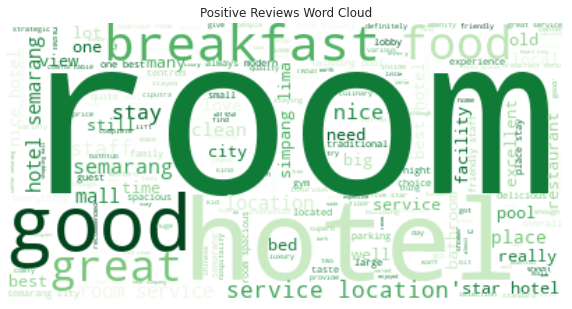

In [19]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

Negative Reviews

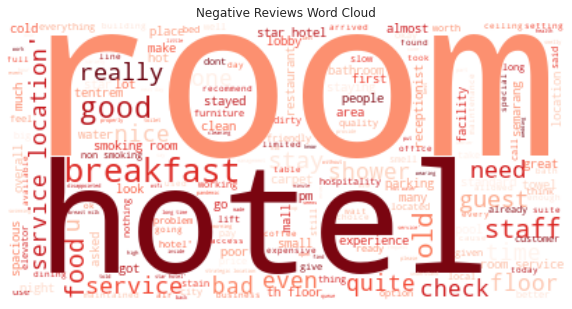

In [20]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

**Feature Extraction from Text**

Bag of words model

In [21]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(750, 3)
(750,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(525, 3)
(225, 3)
(525,)
(225,)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,...,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
0,118,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,242,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,1243,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.071586,0.0,0.0,0.0,0.0,0.0,0.093675,0.0,0.0,0.0
3,62,11.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,197,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


**Training different Classification models**

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.83      1.00      0.91       186

    accuracy                           0.83       225
   macro avg       0.41      0.50      0.45       225
weighted avg       0.68      0.83      0.75       225



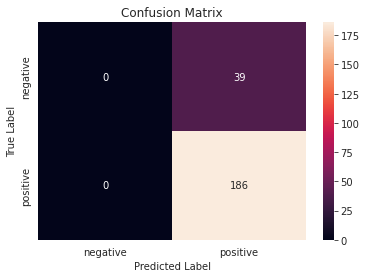

In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       1.00      0.05      0.10        39
           1       0.83      1.00      0.91       186

    accuracy                           0.84       225
   macro avg       0.92      0.53      0.50       225
weighted avg       0.86      0.84      0.77       225



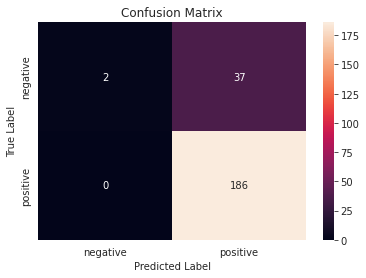

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.75      0.08      0.14        39
           1       0.84      0.99      0.91       186

    accuracy                           0.84       225
   macro avg       0.79      0.54      0.52       225
weighted avg       0.82      0.84      0.78       225



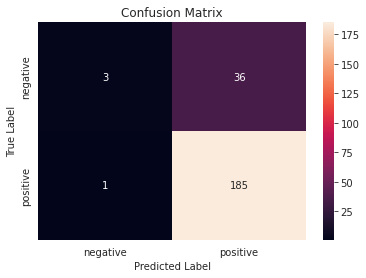

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.86      0.31      0.45        39
           1       0.87      0.99      0.93       186

    accuracy                           0.87       225
   macro avg       0.86      0.65      0.69       225
weighted avg       0.87      0.87      0.84       225



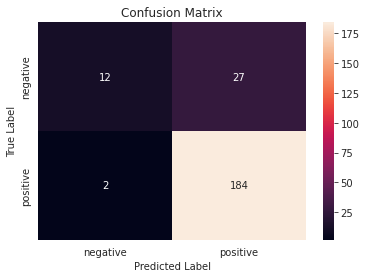

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.11      0.03      0.04        39
           1       0.82      0.96      0.89       186

    accuracy                           0.80       225
   macro avg       0.47      0.49      0.46       225
weighted avg       0.70      0.80      0.74       225



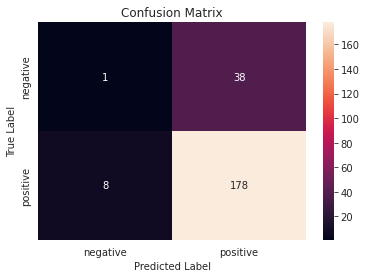

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**The best performing algorithms so far seem to be Linear SVM, Random Forest and Logistic Regression Classifiers.**

In [30]:
from sklearn.model_selection import cross_val_score

models = [MultinomialNB(), LogisticRegression(), RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'), KNeighborsClassifier(n_neighbors = 5)]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 accuracy - 0.8495283018867925 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 precision - 0.8495283018867925 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 recall - 1.0 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 f1 - 0.9186338452906935 

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 accuracy - 0.8514513788098693 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 precision - 0.8567320640883349 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 recall - 0.9910101010101009 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 f1 - 0.9189055941525546 

Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 accuracy - 0.8552612481857764 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 precision - 0.8594681123537949 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 recall - 0.9954545454545455 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 f1 - 0.923423705618981 

SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

KeyboardInterrupt: ignored

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.8488888888888889

In [33]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[1 1 1 1]


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [35]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8888888888888888